# Independent t-test

##### Material
https://onlinestatbook.com/2/sampling_distributions/samplingdist_diff_means.html

#### Gaussian distribution

$$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{ -\frac{1}{2} \left(\frac{x-\mu}{\sigma}\right)^2 } $$
where:
- $ \mu $ is the mean.
- $ \sigma $ is the standard deviation.

**Important property**: If $ X $ and $ Y $ are two independent Gaussian random variables with means $ \mu_X $ and $ \mu_Y $, and standard deviations $ \sigma_X $ and $ \sigma_Y $, then the difference $ Z = X - Y $ is also Gaussian, with mean $ \mu_{X-Y} = \mu_X - \mu_Y $ and variance $ \sigma^2_{\mu_X - \mu_Y} = \sigma^2_{\mu_X} + \sigma^2_{\mu_Y} $.

However, this refers to the distribution of the random variable $ Z $, which represents the difference between two random samples from $ X $ and $ Y $. It doesn't refer to the difference between the probability density functions (PDFs) of $ X $ and $ Y $.

The difference between the PDFs of two Gaussian distributions is not Gaussian; it will generally have a more complex shape that depends on the specific means and standard deviations of the original distributions. 

In the first case, you are take a random sample of $ X $ and a random sample of $ Y $ and you calculate the difference between them. However, in the latter case, you are comparing the difference of the first value $ X $ with the first value of $ Y $ and so on.

### Setups

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import ipywidgets as widgets
from IPython.display import display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import ipywidgets as widgets
from ipywidgets import interactive

from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets

### Population distribution of the difference of two independent Gaussian random variables

##### Continuous variables

In [2]:
def plot_gaussians_and_difference(mean_X=0, mean_Y=0, std_dev_X=1, std_dev_Y=1):
    x = np.linspace(-10, 10, 1000)
    pdf_X = norm.pdf(x, mean_X, std_dev_X)
    pdf_Y = norm.pdf(x, mean_Y, std_dev_Y)
    pdf_Z = norm.pdf(x, mean_X - mean_Y, np.sqrt(std_dev_X**2 + std_dev_Y**2))
    
    # Determine the max xlim and ylim
    max_xlim = max(x)
    max_ylim = max(max(pdf_X), max(pdf_Y), max(pdf_Z))
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    ax1.plot(x, pdf_X, label=f'X: Mean={round(mean_X, 2)}, Std Dev={round(std_dev_X, 2)}')
    ax1.plot(x, pdf_Y, label=f'Y: Mean={round(mean_Y, 2)}, Std Dev={round(std_dev_Y, 2)}')
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
    ax1.set_title('Gaussian Distributions X and Y')
    ax1.set_xlabel('x')
    ax1.set_ylabel('Probability Density')
    ax1.set_xlim([-max_xlim, max_xlim])
    ax1.set_ylim([0, max_ylim])

    ax2.plot(x, pdf_Z, label=f'Z: Mean={round(mean_X - mean_Y, 2)}, Std Dev={round(np.sqrt(std_dev_X**2 + std_dev_Y**2), 2)}')
    ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))
    ax2.set_title('Difference Between X and Y (Z)')
    ax2.set_xlabel('x')
    ax2.set_ylabel('Probability Density')
    ax2.set_xlim([-max_xlim, max_xlim])
    ax2.set_ylim([0, max_ylim])
    
    plt.tight_layout()
    plt.show()
    
mean_X_slider = widgets.FloatSlider(value=0, min=-5, max=5, step=0.1, description='Mean X:')
mean_Y_slider = widgets.FloatSlider(value=0, min=-5, max=5, step=0.1, description='Mean Y:')
std_dev_X_slider = widgets.FloatSlider(value=1, min=0.1, max=5, step=0.1, description='Std Dev X:')
std_dev_Y_slider = widgets.FloatSlider(value=1, min=0.1, max=5, step=0.1, description='Std Dev Y:')

interactive_plot = widgets.interactive(plot_gaussians_and_difference, mean_X=mean_X_slider, mean_Y=mean_Y_slider,
                                       std_dev_X=std_dev_X_slider, std_dev_Y=std_dev_Y_slider)
display(interactive_plot)


interactive(children=(FloatSlider(value=0.0, description='Mean X:', max=5.0, min=-5.0), FloatSlider(value=0.0,…

##### Discretized variables

In [3]:
# Parameters for Gaussian distributions
mean_X, std_dev_X = 2, 1
mean_Y, std_dev_Y = 5, 2

# Generate random samples from X and Y
np.random.seed(42)
samples_X = np.round(np.random.normal(mean_X, std_dev_X, 1000)).astype(int)
samples_Y = np.round(np.random.normal(mean_Y, std_dev_Y, 1000)).astype(int)

# Calculate the difference between the samples
samples_Z = samples_X - samples_Y

# Create a DataFrame to store the data
df = pd.DataFrame({
    'X': samples_X,
    'Y': samples_Y,
    'Z': samples_Z
})

# Determine common bin edges and plot limits
bin_edges = np.arange(min(df['X'].min(), df['Y'].min(), df['Z'].min()) - 0.5,
                      max(df['X'].max(), df['Y'].max(), df['Z'].max()) + 1.5)
bin_width = bin_edges[1] - bin_edges[0]  # Width of each bin
bin_height = 1  # Height of each bin corresponds to 1 unit
xlim = (bin_edges[0], bin_edges[-1])
ylim = (0, max(df['X'].value_counts().max(), df['Y'].value_counts().max(), df['Z'].value_counts().max()))

# Determine x-tick labels
xticks = np.arange(bin_edges[0] + 0.5, bin_edges[-1] - 0.5)

# Function to update the plots
def update(sample_number=0):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    for column, ax in zip(df.columns, axes):
        ax.hist(df[column], bins=bin_edges, alpha=0.6, label=column, edgecolor='black', rwidth=1)
        
        # Calculate the transform to stretch the marker vertically
        transform = ax.transData.inverted().transform(np.array([[0, 1]]))
        stretch_factor = transform[0, 1] - transform[0, 0]
        
        # Calculate the height of the marker based on y-axis scaling
        y_range = ax.get_ylim()[1] - ax.get_ylim()[0]
        marker_height = bin_height / y_range * stretch_factor
        
        # Calculate the width of the marker based on bin width
        marker_width = bin_width
        
        # Create a rectangle marker with the calculated width and height
        marker = patches.Rectangle(
            (df[column].iloc[sample_number] - marker_width/2,
             df[column].iloc[:sample_number + 1].value_counts().loc[df[column].iloc[sample_number]]),
            width=marker_width, height=marker_height, linewidth=2, edgecolor='red', facecolor='none'
        )
        ax.add_patch(marker)
        
        ax.set_title('Distribution of ' + column if column != 'Z' else 'Distribution of Z (= X - Y)')
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        ax.set_xticks(xticks)
        ax.set_ylabel('Count')
        ax.legend()
    plt.show()
    display(df)
    
# Create interactive widget with updated marker appearance
interact(update, sample_number=widgets.IntSlider(description="Sample", min=0, max=len(df) - 1, step=1));

interactive(children=(IntSlider(value=0, description='Sample', max=999), Output()), _dom_classes=('widget-inte…

### Difference of two Gaussians (We don't do that!)

In [4]:
def plot_gaussians(mean1=0, mean2=0, std_dev1=1, std_dev2=1):
    x = np.linspace(-10, 10, 1000)
    y1 = norm.pdf(x, mean1, std_dev1)
    y2 = norm.pdf(x, mean2, std_dev2)
    y_diff = y1 - y2
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    ax1.plot(x, y1, label=f'Mean={mean1:.2f}, Std Dev={std_dev1:.2f}')
    ax1.plot(x, y2, label=f'Mean={mean2:.2f}, Std Dev={std_dev2:.2f}')
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))
    ax1.set_title('Two Gaussian Distributions')
    ax1.set_xlabel('x')
    ax1.set_ylabel('Probability Density')

    ax2.plot(x, y_diff, label='Difference')
    ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))
    ax2.set_title('Difference Between Gaussians')
    ax2.set_xlabel('x')
    ax2.set_ylabel('Difference in Probability Density')
    
    plt.show()

mean1_slider = widgets.FloatSlider(value=0, min=-5, max=5, step=0.1, description='Mean 1:')
mean2_slider = widgets.FloatSlider(value=2, min=-5, max=5, step=0.1, description='Mean 2:')
std_dev1_slider = widgets.FloatSlider(value=1, min=0.1, max=5, step=0.1, description='Std Dev 1:')
std_dev2_slider = widgets.FloatSlider(value=1, min=0.1, max=5, step=0.1, description='Std Dev 2:')

interactive_plot = widgets.interactive(plot_gaussians, mean1=mean1_slider, mean2=mean2_slider,
                                       std_dev1=std_dev1_slider, std_dev2=std_dev2_slider)
display(interactive_plot)


interactive(children=(FloatSlider(value=0.0, description='Mean 1:', max=5.0, min=-5.0), FloatSlider(value=2.0,…

## Sampling distribution for the difference of sampling means
1. From both population distributions, we calculate the SDSM of each curve. 
2. We get a random sample from SDSM A and another from SDSM B, then we calculate its difference
3. We repeat this procedure infinite times
4. We obtain the sampling distribution for the difference of sampling means

According to the property above: If $ X $ and $ Y $ are two independent Gaussian random variables with means $ \mu_X $ and $ \mu_Y $, and standard deviations $ \sigma_X $ and $ \sigma_Y $, then the difference $ Z = X - Y $ is also Gaussian, with mean $ \mu_{X-Y} = \mu_X - \mu_Y $ and variance $ \sigma^2_{\mu_X - \mu_Y} = \sigma^2_{\mu_X} + \sigma^2_{\mu_Y} $.

In [5]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets, HBox, VBox
from IPython.display import display

def plot_graph(mean_A, std_A, mean_B, std_B, n_A, n_B):
    x = np.linspace(min(mean_A - 4 * std_A, mean_B - 4 * std_B), max(mean_A + 4 * std_A, mean_B + 4 * std_B), 1000)

    population_A = norm.pdf(x, mean_A, std_A)
    population_B = norm.pdf(x, mean_B, std_B)
    sampling_dist_A = norm.pdf(x, mean_A, std_A / np.sqrt(n_A))
    sampling_dist_B = norm.pdf(x, mean_B, std_B / np.sqrt(n_B))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    ylim_max = max(max(population_A), max(population_B), max(sampling_dist_A), max(sampling_dist_B)) * 1.1

    for y_vals, means, stds, colors, labels, dashed, mean_label in zip(
            [population_A, population_B, sampling_dist_A, sampling_dist_B],
            [mean_A, mean_B, mean_A, mean_B],
            [std_A, std_B, std_A / np.sqrt(n_A), std_B / np.sqrt(n_B)],
            ['blue', 'red', 'blue', 'red'],
            ['Population A', 'Population B', 'Sampling Distribution A', 'Sampling Distribution B'],
            [True, True, False, False],
            ['', '', '$\mu_A$', '$\mu_B$']):
        linestyle = '--' if dashed else '-'
        ax1.plot(x, y_vals, label=labels, color=colors, linestyle=linestyle)
        y_peak = y_vals[np.abs(x - means).argmin()]
        ax1.plot([means, means], [0, y_peak], color=colors, linestyle=linestyle)  # Vertical line for mean
        if mean_label: # Only display mean value for sampling distributions
            ax1.text(means, -0.05 * ylim_max, mean_label + f'={means:.2f}', ha='center', va='bottom', fontsize=10) # Mean label with value
        y_std = y_vals[np.abs(x - (means + stds)).argmin()]  # Get y value at the standard deviation
        ax1.plot([means, means + stds], [y_std, y_std], color=colors, linestyle=linestyle)  # Horizontal line for standard deviation
        ax1.annotate('$\sigma$' + f'={stds:.2f}', xy=(means + stds, y_std), xytext=(means + stds + 4.3, y_std),  # Standard deviation label with value, moved to the right
                     arrowprops=dict(facecolor='black', shrink=0.1, width=1, headwidth=3), fontsize=10, ha='center')
        ax1.set_ylim(0, ylim_max)
        ax1.xaxis.set_ticklabels([])  # Hide x-tick labels
        ax1.xaxis.set_label_coords(0.5, -0.07)  # Lower the x-axis legend
        ax1.grid(True)  # Turn on grid
        ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
        ax1.set_xlabel('Value')
        ax1.set_ylabel('Density')
        ax1.set_title('Population & Sampling Distributions')

    mean_diff_sampling = mean_A - mean_B
    std_diff_sampling = np.sqrt((std_A ** 2 / n_A) + (std_B ** 2 / n_B))
    x_diff = np.linspace(mean_diff_sampling - 4 * std_diff_sampling, mean_diff_sampling + 4 * std_diff_sampling, 1000)
    sampling_dist_diff = norm.pdf(x_diff, mean_diff_sampling, std_diff_sampling)
    ax2.set_ylim(0, ylim_max)

    # Plotting second figure
    ax2.plot(x_diff, sampling_dist_diff, label='Sampling Distribution of Difference Between Sampling Means', color='purple')
    y_peak_diff = sampling_dist_diff[np.abs(x_diff - mean_diff_sampling).argmin()]
    ax2.plot([mean_diff_sampling, mean_diff_sampling], [0, y_peak_diff], color='purple')  # Vertical line for mean
    ax2.text(mean_diff_sampling, -0.05 * ylim_max, f'$\mu_{{A-B}}={mean_diff_sampling:.2f}$', ha='center', va='bottom', fontsize=10)  # Mean label with value
    y_std_diff = sampling_dist_diff[np.abs(x_diff - (mean_diff_sampling + std_diff_sampling)).argmin()]
    ax2.plot([mean_diff_sampling, mean_diff_sampling + std_diff_sampling], [y_std_diff, y_std_diff], color='purple')  # Horizontal line for standard deviation
    ax2.annotate(f'$\sigma={std_diff_sampling:.2f}$', xy=(mean_diff_sampling + std_diff_sampling, y_std_diff), xytext=(mean_diff_sampling + std_diff_sampling + 0.8, y_std_diff),  # Standard deviation label with value, moved to the right
                 arrowprops=dict(facecolor='black', shrink=0.1, width=1, headwidth=3), fontsize=10, ha='center')
    ax2.xaxis.set_ticklabels([])  # Hide x-tick labels
    ax2.xaxis.set_label_coords(0.5, -0.07)  # Lower the x-axis legend
    ax2.grid(True)  # Turn on grid
    ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))
    ax2.set_xlabel('Value')
    ax2.set_ylabel('Density')
    ax2.set_title('Sampling Distribution of Difference Between Sampling Means')

    plt.tight_layout()
    plt.show()

slider_mean_A = widgets.FloatSlider(value=10, min=0, max=20, description='mean_A')
slider_std_A = widgets.FloatSlider(value=2, min=0.1, max=5, description='std_A')
slider_n_A = widgets.IntSlider(value=30, min=1, max=100, description='n_A')
slider_mean_B = widgets.FloatSlider(value=20, min=0, max=40, description='mean_B')
slider_std_B = widgets.FloatSlider(value=3, min=0.1, max=10, description='std_B')
slider_n_B = widgets.IntSlider(value=40, min=1, max=100, description='n_B')

left_box = VBox([slider_mean_A, slider_std_A, slider_n_A])
right_box = VBox([slider_mean_B, slider_std_B, slider_n_B])

ui = HBox([left_box, right_box])

def update(mean_A, std_A, n_A, mean_B, std_B, n_B):
    plot_graph(mean_A=mean_A, std_A=std_A, mean_B=mean_B, std_B=std_B, n_A=n_A, n_B=n_B)

out = widgets.interactive_output(update, {'mean_A': slider_mean_A, 'std_A': slider_std_A, 'n_A': slider_n_A,
                                          'mean_B': slider_mean_B, 'std_B': slider_std_B, 'n_B': slider_n_B})

display(ui, out)


Output()

### Example

The sampling distribution of the difference between means can be thought of as the distribution that would result if we repeated the following three steps over and over again: 
1. sample n1 scores from Population 1 and n2 scores from Population 2
2. compute the means of the two samples (M1 and M2)
3. compute the difference between means, M1 - M2.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets
import pandas as pd
from itertools import permutations
from itertools import product

def normal_distribution(x, mu, sigma):
    pdf_values = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    return pdf_values

def get_histogram_values(x_vals, y_vals, start, end, num_bins):
    bin_width = (end - start) / num_bins
    bins = np.linspace(start, end, num_bins + 1)
    mid_x_values = bins[:-1] + bin_width / 2
    pdf_values = [y_vals[np.argmin(np.abs(x_vals - x))] for x in mid_x_values]
    print(f"Elements of the population: {mid_x_values}")
    return mid_x_values, pdf_values

def set_last_df(df, population):
    last_df[population] = df

def plot_distribution_with_random_samples(sample_size, mu, sigma, lowest_value, highest_value, title, population):
    fig, ax = plt.subplots(figsize=(6, 4))
    
    x_values = np.linspace(lowest_value, highest_value, 1000)
    pdf_curve = [normal_distribution(x, mu, sigma) for x in x_values]

    bin_width = (highest_value - lowest_value) / num_bins
    mid_x_values, pdf_values = get_histogram_values(x_values, pdf_curve, lowest_value, highest_value, num_bins)

    ax.plot(x_values, pdf_curve, label='PDF', color='red', linestyle='dashed', alpha=0.5, linewidth=1.5)
    ax.bar(mid_x_values, pdf_values, width=bin_width, alpha=0.5, edgecolor='black', linewidth=0.5, label='Histogram')

    # Create DataFrame with unique bin values
    df = pd.DataFrame({'X': mid_x_values})
    df_combinations = create_df_all_combinations_with_replacement(df, sample_size)
    
    # Randomly choose a combination and extract the red dots
    chosen_combination_idx = np.random.randint(0, len(df_combinations))
    chosen_combination = df_combinations.iloc[chosen_combination_idx, :-1]
    random_x = chosen_combination.values
    random_y = [np.random.uniform(0, normal_distribution(x, mu, sigma)) for x in random_x]
    
    # Plot the red points and add to the legend
    ax.scatter(random_x, random_y, color='red', label=f'Random combination {chosen_combination_idx+1}')
    
    ax.set_title(title)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.legend()

    plt.tight_layout()
    plt.show()

    # Set the last DataFrame
    set_last_df(df_combinations, population)

    # Print the chosen combination
    print(f"Chosen combination ({chosen_combination_idx+1}): {chosen_combination.tolist()}")
    
    display(df_combinations)

def create_df_all_combinations_with_replacement(df, sample_size):
    """Calculate all possible combinations (with repetition) of obs and their mean."""
    all_combs = list(product(df['X'].unique(), repeat=sample_size))
    
    columns = [f"Score {i+1}" for i in range(sample_size)] + ['Mean']
    df_combinations = pd.DataFrame(all_combs, columns=columns[:-1])
    df_combinations['Mean'] = df_combinations.mean(axis=1).round(2)
    first_index = "Combination(s) 1"
    other_indices = [f"{i+1}" for i in range(1, len(all_combs))]
    df_combinations.index = [first_index] + other_indices
    return df_combinations

### MAIN ###

num_bins = 5
last_df = { 'A': None, 'B': None }

# Slider for Population A
slider_A = widgets.IntSlider(
    value=3,
    min=1,
    max=10,
    step=1,
    description='Sample size (A):',
    continuous_update=False
)

# Population A
mu_A = 70
sigma_A = 3
lowest_value_A = 55
highest_value_A = 85
title="Population A"
widget_A = widgets.interactive(plot_distribution_with_random_samples, sample_size=slider_A, mu=widgets.fixed(mu_A), sigma=widgets.fixed(sigma_A), 
                    lowest_value=widgets.fixed(lowest_value_A), highest_value=widgets.fixed(highest_value_A), title=widgets.fixed(title), population=widgets.fixed('A'))

display(widget_A)

# Slider for Population B
slider_B = widgets.IntSlider(
    value=5,
    min=1,
    max=10,
    step=1,
    description='Sample size (B):',
    continuous_update=False
)

# Population B (you can define your own parameters)
mu_B = 75
sigma_B = 4
lowest_value_B = 60
highest_value_B = 90
title="Population B"
widget_B = widgets.interactive(plot_distribution_with_random_samples, sample_size=slider_B, mu=widgets.fixed(mu_B), sigma=widgets.fixed(sigma_B), 
                    lowest_value=widgets.fixed(lowest_value_B), highest_value=widgets.fixed(highest_value_B), title=widgets.fixed(title), population=widgets.fixed('B'))

display(widget_B)


interactive(children=(IntSlider(value=3, continuous_update=False, description='Sample size (A):', max=10, min=…

interactive(children=(IntSlider(value=5, continuous_update=False, description='Sample size (B):', max=10, min=…

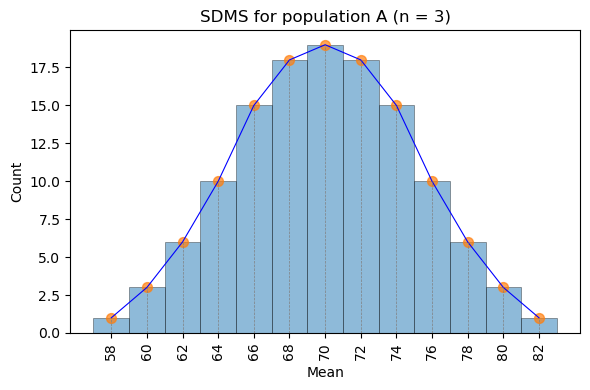

,Score 1,Score 2,Score 3,Mean
Combination(s) 1,58.0,58.0,58.0,58.0
2,58.0,58.0,64.0,60.0
3,58.0,58.0,70.0,62.0
4,58.0,58.0,76.0,64.0
5,58.0,58.0,82.0,66.0
...,...,...,...,...
121,82.0,82.0,58.0,74.0
122,82.0,82.0,64.0,76.0
123,82.0,82.0,70.0,78.0
124,82.0,82.0,76.0,80.0


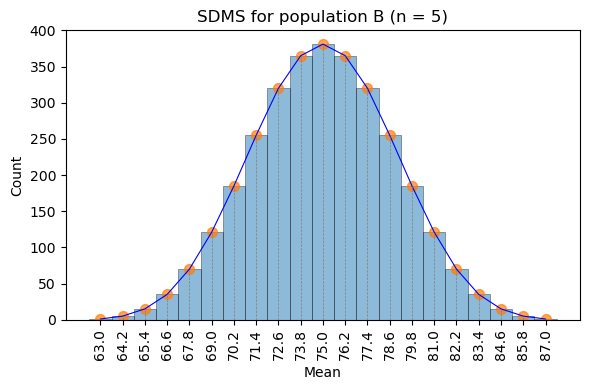

,Score 1,Score 2,Score 3,Score 4,Score 5,Mean
Combination(s) 1,63.0,63.0,63.0,63.0,63.0,63.0
2,63.0,63.0,63.0,63.0,69.0,64.2
3,63.0,63.0,63.0,63.0,75.0,65.4
4,63.0,63.0,63.0,63.0,81.0,66.6
5,63.0,63.0,63.0,63.0,87.0,67.8
...,...,...,...,...,...,...
3121,87.0,87.0,87.0,87.0,63.0,82.2
3122,87.0,87.0,87.0,87.0,69.0,83.4
3123,87.0,87.0,87.0,87.0,75.0,84.6
3124,87.0,87.0,87.0,87.0,81.0,85.8


In [7]:
def plot_sdsm(df, title):
    sample_size = df.shape[1] - 1 # Number of columns minus one for the 'Mean' column
    mean_counts = df.groupby('Mean').size().reset_index(name='Counts')

    fig, ax = plt.subplots(figsize=(6, 4))

    # Determine the bar width based on the mean differences
    if len(mean_counts['Mean']) > 1:
        bar_width = np.min(np.diff(mean_counts['Mean'].sort_values()))
    else:
        bar_width = 0.1

    # Plotting the histogram with alignment to the center using exact values and counts
    ax.bar(mean_counts['Mean'], mean_counts['Counts'], width=bar_width, alpha=0.5, edgecolor='black', linewidth=0.5, align='center')

    ax.scatter(mean_counts['Mean'], mean_counts['Counts'], alpha=0.7, s=50)
    ax.plot(mean_counts['Mean'], mean_counts['Counts'], color='blue', linewidth=0.8)
    for _, row in mean_counts.iterrows():
        ax.plot([row['Mean'], row['Mean']], [0, row['Counts']], linestyle='--', color='grey', linewidth=0.5)

    # Updated title to include the sample size
    ax.set_title(f"{title} (n = {sample_size})")

    ax.set_xlabel('Mean')
    ax.set_ylabel('Count')

    if len(mean_counts['Mean']) > 30:
        ax.set_xticks(np.linspace(mean_counts['Mean'].min(), mean_counts['Mean'].max(), 10))
    else:
        ax.set_xticks(mean_counts['Mean'].values)
    ax.set_ylim(0,)
    if len(mean_counts['Mean']) > 12:
        ax.tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

    display(df)

# Example usage
plot_sdsm(last_df['A'], f"SDMS for population A")
plot_sdsm(last_df['B'], f"SDMS for population B")

In [8]:
import pandas as pd
import numpy as np

# Number of random selections
n_random_selection = 1000

# DataFrame to store the results
result_df = pd.DataFrame(columns=['Mean A', 'Mean B', 'Mean A - Mean B'])

# Randomly selecting 'Mean' values from last_df['A'] and last_df['B'], calculating the difference, and appending to result_df
for _ in range(n_random_selection):
    mean_a = np.random.choice(last_df['A']['Mean'])
    mean_b = np.random.choice(last_df['B']['Mean'])
    difference = mean_a - mean_b
    result_df.loc[len(result_df)] = [mean_a, mean_b, difference]

# Displaying the first few rows of the result
display(result_df)


,Mean A,Mean B,Mean A - Mean B
0,64.0,78.6,-14.6
1,72.0,72.6,-0.6
2,78.0,69.0,9.0
3,68.0,83.4,-15.4
4,68.0,78.6,-10.6
...,...,...,...
995,64.0,76.2,-12.2
996,78.0,73.8,4.2
997,74.0,72.6,1.4
998,68.0,75.0,-7.0


### Sampling distribution of Difference Between Means

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ipywidgets import interact, widgets
import pandas as pd

def update(sample_number=0):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    for column, ax in zip(result_df.columns, axes):
        values, counts = np.unique(result_df[column], return_counts=True)
        edges = np.concatenate((values - 0.5, [values[-1] + 0.5]))
        width = edges[1] - edges[0]

        ax.bar(values, counts, width=width, alpha=0.6, label=column, edgecolor='black')

        # Determine x-tick labels
        xticks = values

        # Get the current value for the given sample_number
        current_value = result_df[column].iloc[sample_number]

        # Count occurrences of the current value from sample 1 until the current sample
        y_position = (result_df[column].iloc[:sample_number + 1] == current_value).sum()

        # Plot a red dot at the calculated x and y position
        ax.plot(current_value, y_position, 'ro')

        ax.set_title(f"Distribution of {column} (n = {df.shape[0]})")
        ax.set_xlim(edges[0], edges[-1])
        ax.set_xticks(xticks)
        ax.set_ylabel('Count')
        ax.legend()

    plt.show()
    display(result_df)

# Create interactive widget with updated marker appearance
interact(update, sample_number=widgets.IntSlider(description="Sample", min=0, max=len(result_df) - 1, step=1));


interactive(children=(IntSlider(value=0, description='Sample', max=999), Output()), _dom_classes=('widget-inte…